In [9]:
# prompt: I eant to plot a heat map of a function with two inputs

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def plot_function(funct, cmap='viridis'):
    # Evaluate the function at each point on the grid
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = funct(X, Y)

    # Create the heatmap
    z_min = np.min(Z)
    z_max = np.max(Z)
    if z_min < 0 < z_max:
        norm = TwoSlopeNorm(vmin=z_min, vcenter=0, vmax=z_max)
    else:
        norm = TwoSlopeNorm(vmin=z_min, vcenter=(z_min + z_max) / 2, vmax=z_max)
    plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap=cmap, norm=norm)
    plt.colorbar(label='Function Value')

    # Add labels and title
    plt.xlabel('prediction')
    plt.ylabel('observed')
    plt.title(funct.__name__)

    # Show the plot
    plt.show()

In [10]:

def mse(prediction, observed):
    return (prediction - observed) ** 2


def my_made(prediction, observed):
    return - np.sign(prediction * observed) * np.abs(prediction - observed)


def wce(prediction, observed):
    return - np.abs(observed) * (sigmoid(observed) * np.log(sigmoid(prediction)) + (1 - sigmoid(observed)) * np.log(
        1 - sigmoid(prediction)))


def mae(prediction, observed):
    return np.abs(prediction - observed)


def false_anatoley(prediction, observed):
    y_sign = np.tanh(prediction)
    return - observed * y_sign


def mul(prediction, observed):
    return - observed * prediction


def hinge_loss(prediction, observed):
    return np.maximum(0, 1 - prediction * np.sign(observed))


def unsaturated_anatoley(prediction, observed):
    sign = np.sign(prediction * observed)
    mul_mask = (1 - sign) / 2
    masked_mul = mul(prediction, observed) * mul_mask
    anatoley_mask = (1 + sign) / 2
    masked_anatoley = false_anatoley(prediction, observed) * anatoley_mask
    return masked_mul + masked_anatoley


def rectified_margin_error(prediction, observation):
    observation_sign = np.sign(observation)
    return np.maximum(0, observation_sign * (observation - prediction))

In [4]:
def d_f(f, epsilon=1e-6):
    return lambda x, y: (f(x + epsilon, y) - f(x, y)) / epsilon

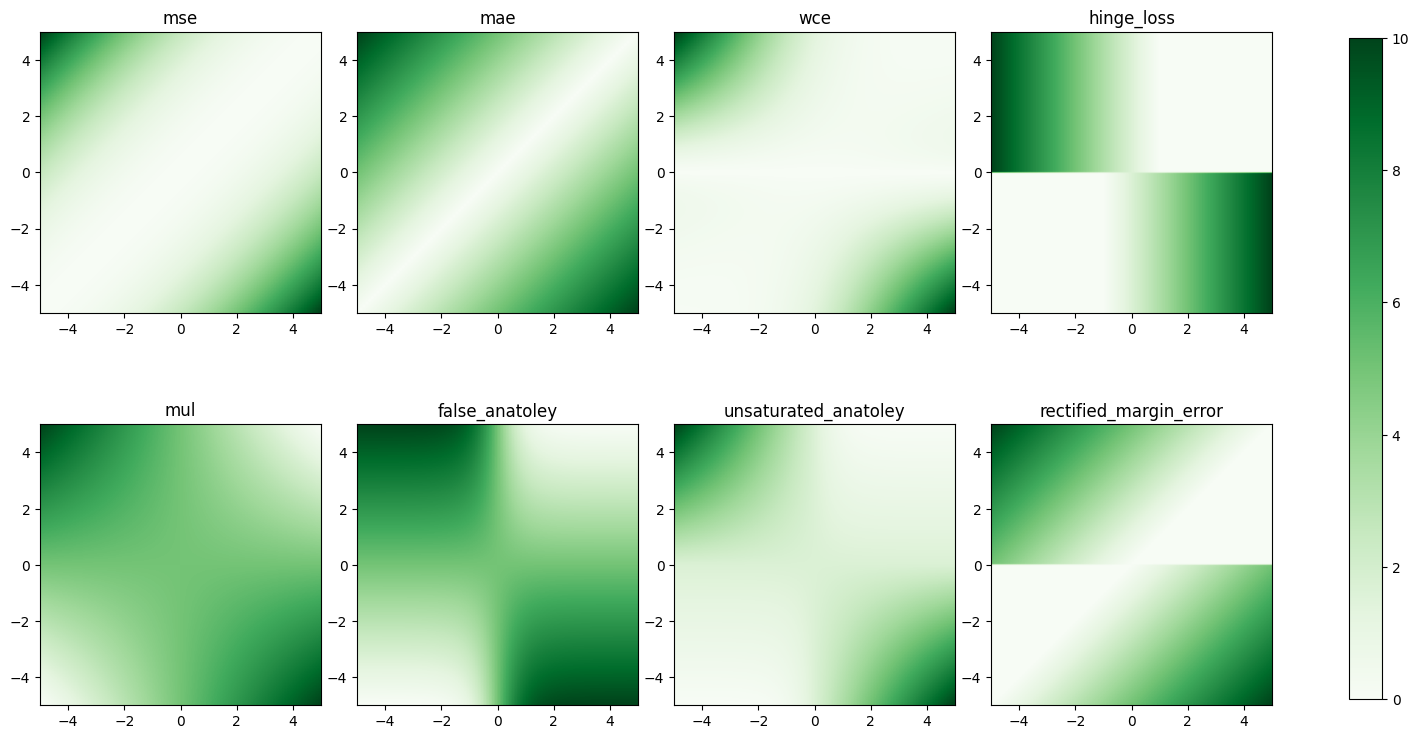

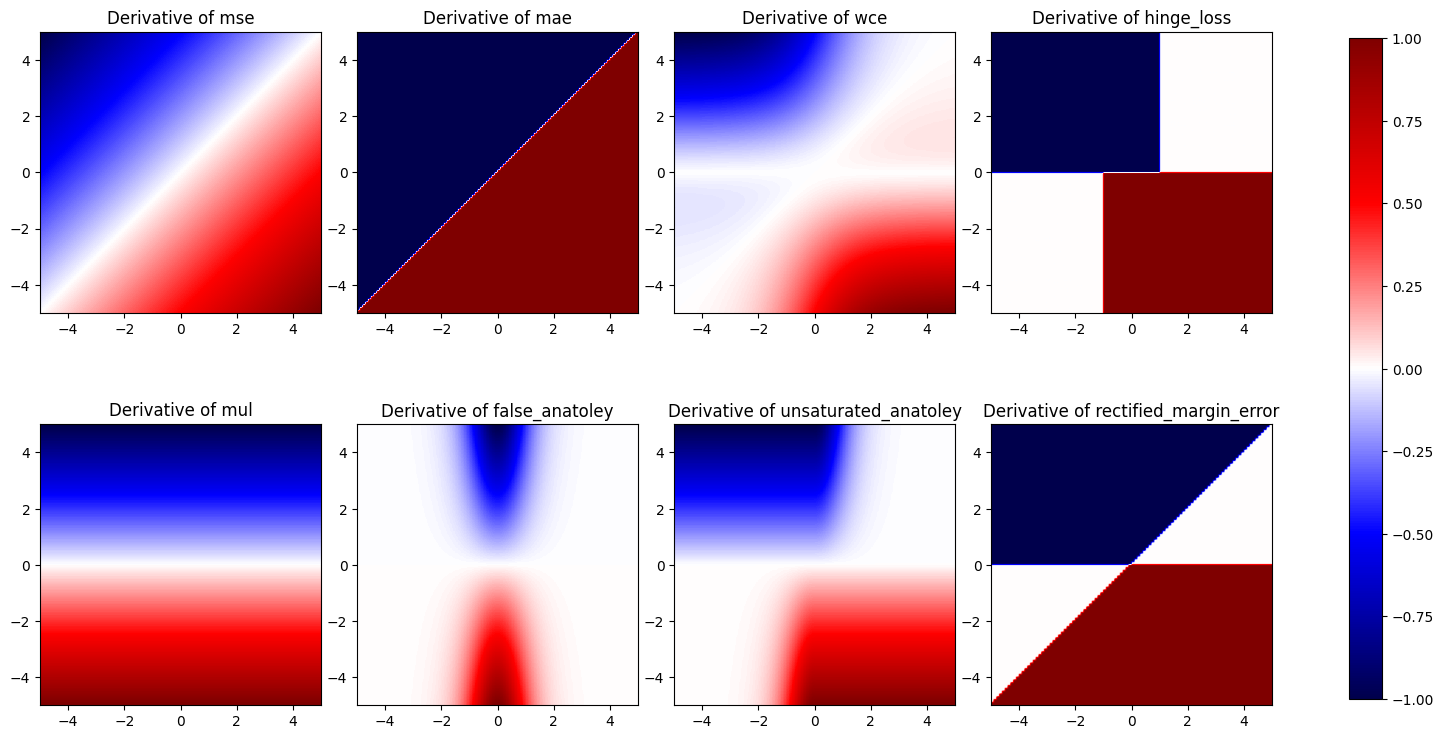

In [17]:
# prompt: make multiple plots in a grid

import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code for functions and plotting) ...

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

loss_functions = [mse, mae, wce, hinge_loss, mul, false_anatoley, unsaturated_anatoley, rectified_margin_error]

for i, loss in enumerate(loss_functions):
    # Plot the original loss function
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = loss(X, Y)
    im = axes[i].imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='Greens')
    axes[i].set_title(loss.__name__)

# Adjust spacing between subplots
plt.tight_layout()
plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9)  # add a single colorbar

plt.show()

# Create a figure and a set of subplots for derivatives
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, loss in enumerate(loss_functions):
    # Plot the derivative
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = d_f(loss)(X, Y)
    norm = TwoSlopeNorm(vmin=np.min(Z), vcenter=0, vmax=np.max(Z))
    im = axes[i].imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='seismic', norm=norm)
    axes[i].set_title(f"Derivative of {loss.__name__}")

plt.tight_layout()
plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9)  # add a single colorbar
plt.show()

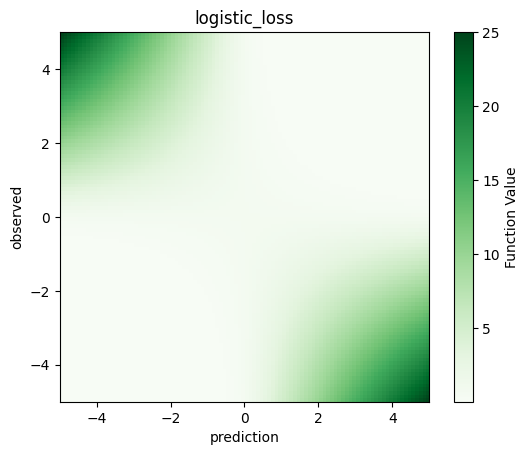

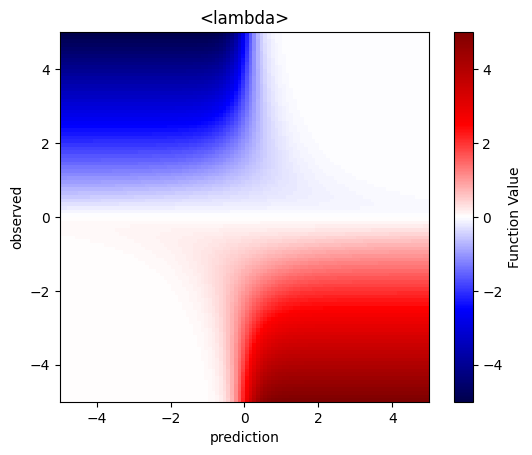

In [18]:
def logistic_loss(prediction, observed):
    return np.log(1 + np.exp(-observed * prediction))


plot_function(logistic_loss, cmap='Greens')
plot_function(d_f(logistic_loss), cmap='seismic')